In [3]:
"""
The objective of this project is to demonstrate understanding of developing a Multiple Linear Regression (MLR) model
for predicting stock prices using multiple features.
Further explaination of what went right and wrong will be in the conclusion section.
"""
# Load dataset
import pandas as pd
df = pd.read_csv('Sept 2023 - 2024 Nvidia price.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,PE_Ratio,Revenue
0,6-Sep-24,108.04,108.15,100.95,102.83,102.83,411712100.0,48.25,30040.0
1,5-Sep-24,104.99,109.65,104.76,107.21,107.21,306850700.0,72.20,30040.0
2,4-Sep-24,105.41,113.27,104.12,106.21,106.21,372470300.0,72.20,30040.0
3,3-Sep-24,116.01,116.21,107.29,108.00,108.00,477155100.0,72.20,30040.0
4,30-Aug-24,119.53,121.75,117.22,119.37,119.37,333751600.0,72.20,30040.0


In [4]:
# Sorting Date column to ascending order to avoid forward bias
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')
df = df.sort_values(by='Date', ascending=True)

In [5]:
# Creating RSI values
# Calculate daily price changes
df['Change'] = df['Close'].diff()

# Separate gains and losses
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)
df['Loss'] = df['Change'].apply(lambda x: -x if x < 0 else 0)

period = 14
df['Avg_Gain'] = df['Gain'].ewm(span=period, adjust=False).mean()
df['Avg_Loss'] = df['Loss'].ewm(span=period, adjust=False).mean()

# Calculate RS and RSI
df['RS'] = df['Avg_Gain'] / df['Avg_Loss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Display the DataFrame with RSI
print(df[['Close', 'RSI']])

      Close        RSI
251   46.24        NaN
250   45.57   0.000000
249   45.18   0.000000
248   44.87   0.000000
247   45.49  38.324948
..      ...        ...
4    119.37  44.879522
3    108.00  30.763332
2    106.21  29.100639
1    107.21  31.487587
0    102.83  26.909101

[252 rows x 2 columns]


In [9]:
# Calculate SMA
period = 14
df['SMA'] = df['Close'].rolling(window=period, min_periods=1).mean()

df['Returns'] = df['SMA'].pct_change()
df['Returns'] = df['Returns'] * -1
df['Returns'] = df['Returns'].fillna(0)
df['Returns'] = df['Returns'].ffill()

# Display the DataFrame with SMA
print(df[['Close', 'SMA']])


      Close         SMA
251   46.24   46.240000
250   45.57   45.905000
249   45.18   45.663333
248   44.87   45.465000
247   45.49   45.470000
..      ...         ...
4    119.37  124.132143
3    108.00  123.550714
2    106.21  122.702857
1    107.21  121.585000
0    102.83  120.031429

[252 rows x 2 columns]


In [11]:
# Making Bollinger Band indicator
df['Middle_Band'] = df['Close'].rolling(window=20).mean()
df['Standard_Deviation'] = df['Close'].rolling(window=20).std()
df['Upper_Band'] = df['Middle_Band'] + (2 * df['Standard_Deviation'])
df['Lower_Band'] = df['Middle_Band'] - (2 * df['Standard_Deviation'])

In [13]:
df['Returns'].unique()

array([ 0.00000000e+00,  7.24480969e-03,  5.26449552e-03,  4.34338273e-03,
       -1.09974706e-04, -4.03196247e-04,  4.98819687e-03,  3.56658145e-03,
        3.89258438e-03,  5.97546498e-03,  7.40203902e-03,  5.10514514e-03,
        3.27786879e-03,  3.32260798e-03,  6.14687276e-03,  4.06857518e-03,
        2.76739091e-03,  1.48664497e-04,  3.25458450e-03,  2.55250029e-03,
       -1.31275029e-03, -2.97055993e-03, -2.89557721e-03, -5.87342440e-03,
       -9.49678520e-03, -8.66004842e-03, -5.21907216e-03, -6.71431319e-03,
       -2.33990736e-03,  1.41337145e-03,  2.22642770e-03,  5.40316539e-03,
        8.81382007e-04,  6.09492037e-04,  4.67027235e-03,  8.75552259e-03,
        7.75925173e-03,  7.60680678e-03,  9.96134404e-03,  7.69217934e-03,
        3.27896418e-03,  1.83888655e-03, -3.05918940e-03, -6.33561932e-03,
       -7.48455369e-03, -9.24048529e-03, -8.82653229e-03, -8.09637296e-03,
       -1.27594806e-02, -1.36859272e-02, -1.41635911e-02, -1.26594090e-02,
       -1.47894462e-02, -

In [15]:
#data cleaning
df.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Adj Close              0
Volume                 0
PE_Ratio               0
Revenue                0
Change                 1
Gain                   0
Loss                   0
Avg_Gain               0
Avg_Loss               0
RS                     1
RSI                    1
SMA                    0
Returns                0
Middle_Band           19
Standard_Deviation    19
Upper_Band            19
Lower_Band            19
dtype: int64

In [17]:
# Removing the rows with missing values.
df.dropna(inplace=True)
df.isnull().sum()

Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
PE_Ratio              0
Revenue               0
Change                0
Gain                  0
Loss                  0
Avg_Gain              0
Avg_Loss              0
RS                    0
RSI                   0
SMA                   0
Returns               0
Middle_Band           0
Standard_Deviation    0
Upper_Band            0
Lower_Band            0
dtype: int64

In [19]:
# Making sure all the values are numerical values except the Date Column.
print(df.dtypes)

Date                  datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Adj Close                    float64
Volume                       float64
PE_Ratio                     float64
Revenue                      float64
Change                       float64
Gain                         float64
Loss                         float64
Avg_Gain                     float64
Avg_Loss                     float64
RS                           float64
RSI                          float64
SMA                          float64
Returns                      float64
Middle_Band                  float64
Standard_Deviation           float64
Upper_Band                   float64
Lower_Band                   float64
dtype: object


In [21]:
# Import rest of the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import metrics

# Assessing correlations and multicollinearity among all variables to evaluate their suitability for Multiple Linear Regression (MLR)
X1 = np.array(df['Volume'])
X2 = np.array(df['PE_Ratio'])
X3 = np.array(df['Revenue'])
X4 = np.array(df['RSI'])
X5 = np.array(df['SMA'])
X6 = np.array(df['Returns'])
X7 = np.array(df['Lower_Band'])
X8 = np.array(df['Middle_Band'])
X9 = np.array(df['Upper_Band'])

y = np.array(df['Close'])

In [22]:
X_list = [X1, X2, X3, X4, X5, X6, X7, X8, X9]
labels = ['Volume','PE_Ratio','Revenue','RSI','SMA', 'Returns', 'Lower_Band', 'Middle_Band', 'Upper_Band']
results = {}

# Creating a function to calculate features' Slope, intercept, R, P, and standard error values.
for i, X in enumerate(X_list):
    slope, intercept, r_value, p_value, std_err = stats.linregress(X, y)
    results[labels[i]] = {'slope': slope, 'intercept': intercept, 'r': r_value, 'p': p_value, 'std_err': std_err}

# Making the features appear as observations
results_df = pd.DataFrame(results).T
results_df

,slope,intercept,r,p,std_err
Volume,-4.636708e-08,103.146756,-0.220969,6.815654e-04,1.346488e-08
PE_Ratio,-1.309285e+00,184.791279,-0.558908,1.521205e-20,1.278093e-01
Revenue,-9.871832e-04,118.595607,-0.506120,1.466295e-16,1.106825e-04
RSI,-4.208780e-02,85.380509,-0.024347,7.116137e-01,1.137063e-01
SMA,9.844698e-01,3.257289,0.978216,1.005940e-159,1.374556e-02
Returns,-3.018927e+02,81.514213,-0.083868,2.021158e-01,2.360042e+02
Lower_Band,1.096912e+00,5.798577,0.936468,4.401291e-107,2.703186e-02
Middle_Band,9.853097e-01,4.203113,0.969647,2.683980e-143,1.634733e-02
Upper_Band,8.625983e-01,5.738211,0.978060,2.281760e-159,1.208865e-02


<Axes: >

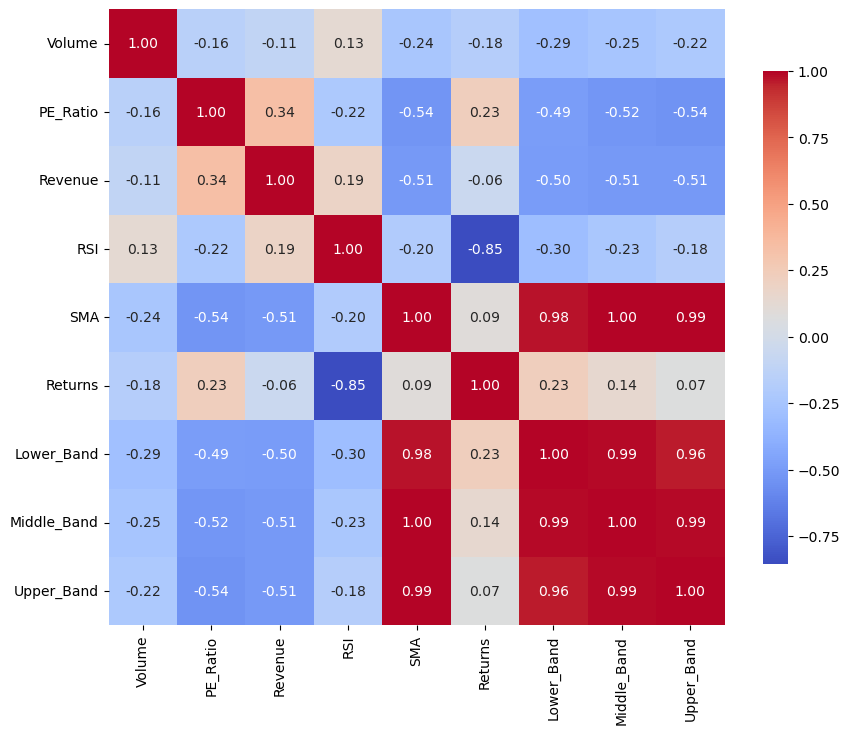

In [23]:
data = pd.DataFrame({
    'Volume': X1,
    'PE_Ratio': X2,
    'Revenue': X3,
    'RSI': X4,
    'SMA': X5,
    'Returns': X6,
    'Lower_Band': X7,
    'Middle_Band': X8,
    'Upper_Band': X9
})
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)

# Standardization
standard_scaler = StandardScaler()
df_standardized = pd.DataFrame(standard_scaler.fit_transform(data), columns=data.columns)

correlation_matrix = df_standardized.corr()
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [24]:
df_standardized = df_standardized.fillna(0)
X = df_standardized
y = df[['Close']]

# Reshape y to be a 2D array
y = y.values.reshape(-1, 1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the y-values
y_standardized = scaler.fit_transform(y)

# Splitting dataset into training and testing sets
train_size = int(len(data) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_standardized[:train_size], y_standardized[train_size:]

In [25]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.19788806327154787
Mean Squared Error: 0.06342899479614143
Root Mean Squared Error: 0.2518511361819546


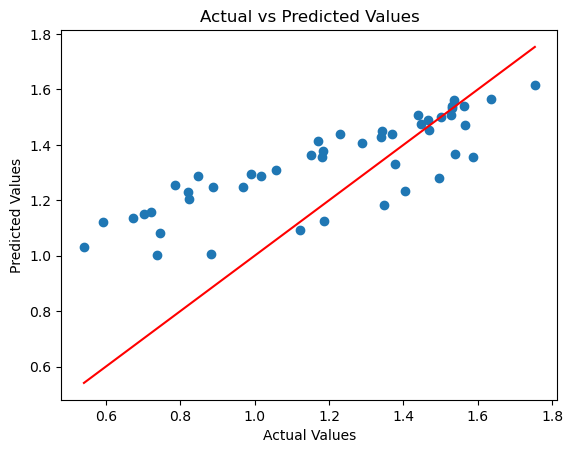

In [28]:
# Plotting the MLR
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.show()

In [29]:
from sklearn.metrics import r2_score
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print('R-squared:', r_squared)

R-squared: 0.4030562293959258


In [40]:
"""
Conclusion:
- Objective of this project is to demonstrate my understanding of MLR and its implementation process.
- High correlation values among features indicate significant multicollinearity.
- Negative R-sqaured value suggests that the model's predictions are less accurate than
simply using the avg value of the target variable for all predictions.
- Plotting shows the features didn't fit with the model very well.
- The model is not suitable for the data,or the data itself have issues. (Probably mix of both)

Suggestions:
- Use longer timeframe than 1 year to have more valuable datasets.
- Remove the features that have high Correlation values to other features.
- Each additional feature needs to add enough marginal r value that it’s worth the tradeoff of overfitting.
"""

'\nSuggestions:\n'